In [1]:
%autosave 1
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Autosaving every 1 seconds


In [2]:
###### MANY FACTORS

prop_mt_start = 0.2
prop_mt_end = 0.8
prop_mt_samples = 5

p_start = 0.01
p_end = 0.10
p_samples = 10

gamma_start = 0.5
gamma_end = 1.0
gamma_samples = 6

b = 0.1

num_trials = 102

In [3]:
# data structure:# (midpoint ratio, gamma, time_cost)
data = np.zeros((5, gamma_samples, p_samples))

for p in np.linspace(p_start, p_end, p_samples):
    for g in np.linspace(gamma_start, gamma_end, gamma_samples):
        b = 0.2
        mt = 0.2

        file1 = open("../data_t4/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, b), "r")
        file2 = open("../data_t4/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 1.5 * b), "r")
        file3 = open("../data_t4/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 2 * b), "r")
        file4 = open("../data_t4/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 2.5 * b), "r")
        file5 = open("../data_t4/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 3 * b), "r")

        gamma_index = int(np.where(np.linspace(gamma_start, gamma_end, gamma_samples) == g)[0])
        p_index = int(np.where(np.linspace(p_start, p_end, p_samples) == p)[0])
        
        num_lines = 0
        num_basis = 0
        for l in file1:
            num_lines += 1
            num_basis += int(l.split(',')[1])

        avg_basis = num_basis / num_lines
        data[0, gamma_index, p_index] = avg_basis / num_trials # ratio 1

        num_lines = 0
        num_basis = 0
        for l in file2:
            num_lines += 1
            num_basis += int(l.split(',')[1])

        avg_basis = num_basis / num_lines
        data[1, gamma_index, p_index] = avg_basis / num_trials # ratio 1.5

        num_lines = 0
        num_basis = 0
        for l in file3:
            num_lines += 1
            num_basis += int(l.split(',')[1])

        avg_basis = num_basis / num_lines
        data[2, gamma_index, p_index] = avg_basis / num_trials # ratio 2
        
        num_lines = 0
        num_basis = 0
        for l in file4:
            num_lines += 1
            num_basis += int(l.split(',')[1])

        avg_basis = num_basis / num_lines
        data[3, gamma_index, p_index] = avg_basis / num_trials # ratio 2.5
        
        num_lines = 0
        num_basis = 0
        for l in file5:
            num_lines += 1
            num_basis += int(l.split(',')[1])

        avg_basis = num_basis / num_lines
        data[4, gamma_index, p_index] = avg_basis / num_trials # ratio 3

        file1.close()
        file2.close()
        file3.close()
        file4.close()
        file5.close()

In [3]:
#### MUCH DATA

mt = 0.3
g = 0.9

p_start = 0.05
p_end = 0.30
p_samples = 6

b = 0.2

num_trials = 102

data = np.zeros((5, 1, p_samples))

for p in np.linspace(p_start, p_end, p_samples):
    file1 = open("../data/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, b), "r")
    file2 = open("../data/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 1.5 * b), "r")
    file3 = open("../data/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 2 * b), "r")
    file4 = open("../data/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 2.5 * b), "r")
    file5 = open("../data/data%.2f%.2f%.2f%.2f%.2f" % (p, mt, g, b, 3 * b), "r")
    
    gamma_index = 0
    
    p_index = int(np.where(np.linspace(p_start, p_end, p_samples) == p)[0])
        
    num_lines = 0
    num_basis = 0
    for l in file1:
        num_lines += 1
        num_basis += int(l.split(',')[1])

    avg_basis = num_basis / num_lines
    data[0, gamma_index, p_index] = avg_basis / num_trials # ratio 1

    num_lines = 0
    num_basis = 0
    for l in file2:
        num_lines += 1
        num_basis += int(l.split(',')[1])

    avg_basis = num_basis / num_lines
    data[1, gamma_index, p_index] = avg_basis / num_trials # ratio 1.5

    num_lines = 0
    num_basis = 0
    for l in file3:
        num_lines += 1
        num_basis += int(l.split(',')[1])

    avg_basis = num_basis / num_lines
    data[2, gamma_index, p_index] = avg_basis / num_trials # ratio 2

    num_lines = 0
    num_basis = 0
    for l in file4:
        num_lines += 1
        num_basis += int(l.split(',')[1])

    avg_basis = num_basis / num_lines
    data[3, gamma_index, p_index] = avg_basis / num_trials # ratio 2.5

    num_lines = 0
    num_basis = 0
    for l in file5:
        num_lines += 1
        num_basis += int(l.split(',')[1])

    avg_basis = num_basis / num_lines
    data[4, gamma_index, p_index] = avg_basis / num_trials # ratio 3

    file1.close()
    file2.close()
    file3.close()
    file4.close()
    file5.close()

<IPython.core.display.Javascript object>


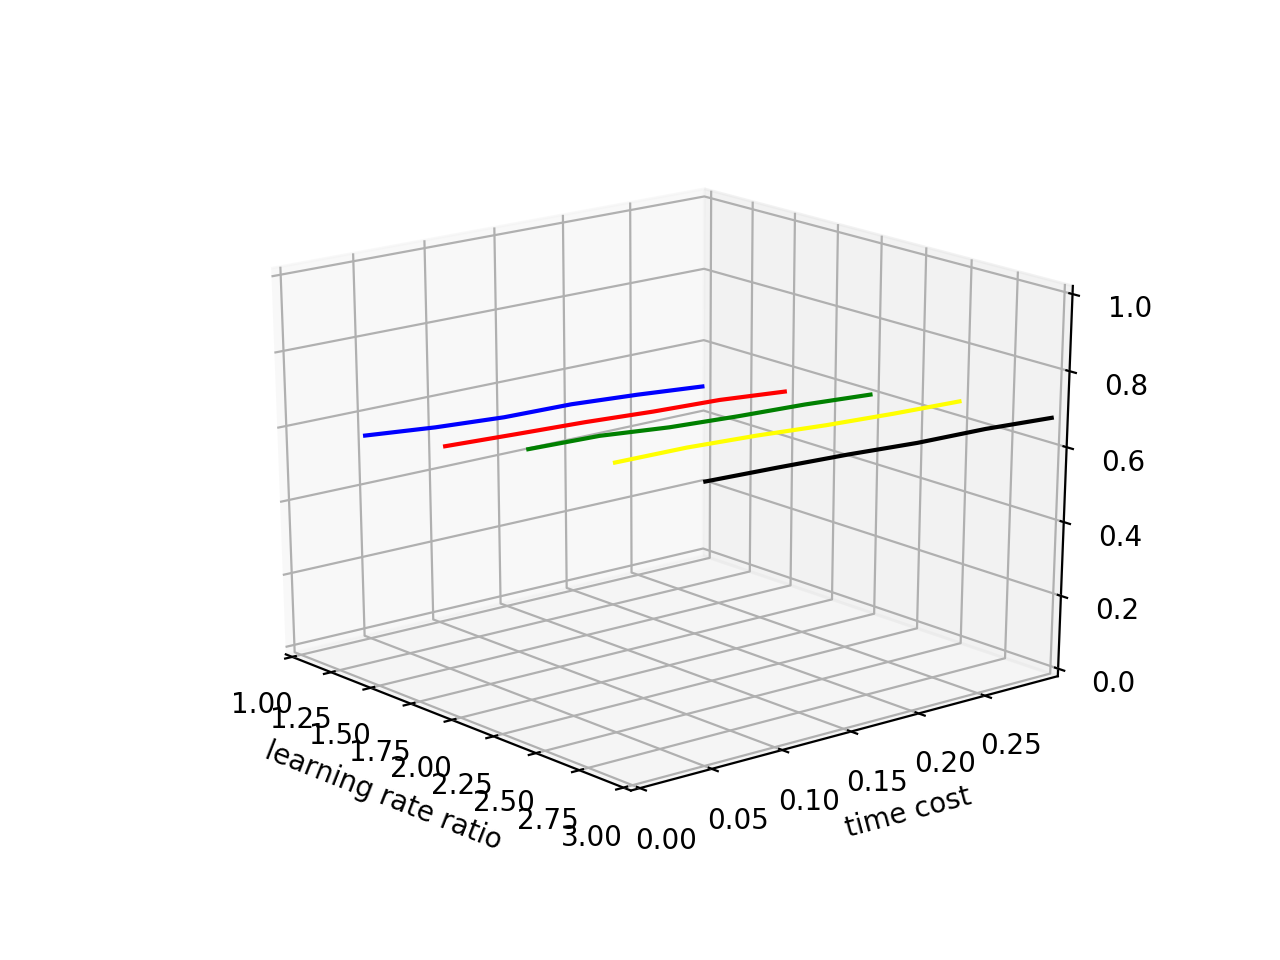

(5, 1, 6)


In [4]:
#### data

gamma_index = 0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(data.shape)
# XX, YY = np.meshgrid((1, 1.5, 2), (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10))
ax.plot((1, 1, 1, 1, 1, 1), (0.05, 0.10, 0.15, 0.20, 0.25, 0.30), zs=data[0, gamma_index, :], color='blue');
ax.plot((1.5, 1.5, 1.5, 1.5, 1.5, 1.5), (0.05, 0.10, 0.15, 0.20, 0.25, 0.30), zs=data[1, gamma_index, :], color='red');
ax.plot((2, 2, 2, 2, 2, 2), (0.05, 0.10, 0.15, 0.20, 0.25, 0.30), zs=data[2, gamma_index, :], color='green');
ax.plot((2.5, 2.5, 2.5, 2.5, 2.5, 2.5), (0.05, 0.10, 0.15, 0.20, 0.25, 0.30), zs=data[3, gamma_index, :], color='yellow');
ax.plot((3, 3, 3, 3, 3, 3), (0.05, 0.10, 0.15, 0.20, 0.25, 0.30), zs=data[4, gamma_index, :], color='black');
ax.set_xlim(1, 3)
ax.set_ylim(0, 0.3)
ax.set_zlim(0, 1)
plt.xlabel('learning rate ratio');
plt.ylabel('time cost');

<IPython.core.display.Javascript object>


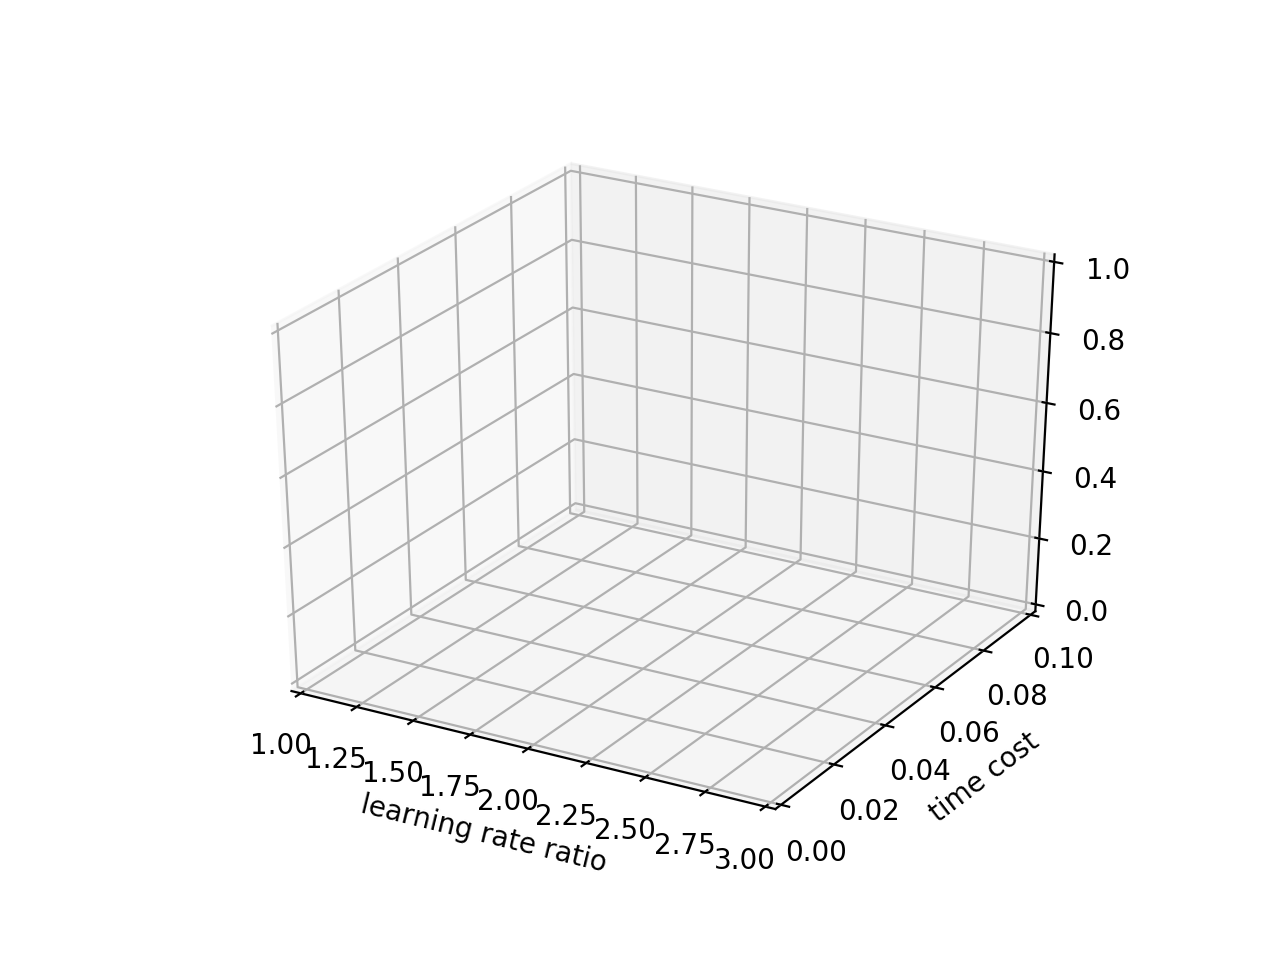

(5, 1, 6)


In [5]:
#### factors

gamma_index = 0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(data.shape)
# XX, YY = np.meshgrid((1, 1.5, 2), (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10))
ax.plot((1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10), zs=data[0, gamma_index, :], color='blue');
ax.plot((1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5), (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10), zs=data[1, gamma_index, :], color='red');
ax.plot((2, 2, 2, 2, 2, 2, 2, 2, 2, 2), (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10), zs=data[2, gamma_index, :], color='green');
ax.plot((2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5), (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10), zs=data[3, gamma_index, :], color='yellow');
ax.plot((3, 3, 3, 3, 3, 3, 3, 3, 3, 3), (0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10), zs=data[4, gamma_index, :], color='black');
ax.set_xlim(1, 3)
ax.set_ylim(0, 0.1)
ax.set_zlim(0, 1)
plt.xlabel('learning rate ratio');
plt.ylabel('time cost');

In [ ]:
def reward(l, k):
    coef = l / k
    param = 1 + np.exp(-k * (x))